In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

/home/alberto/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [2]:
df1 = pd.read_csv('bank-full.csv',sep = ';')
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


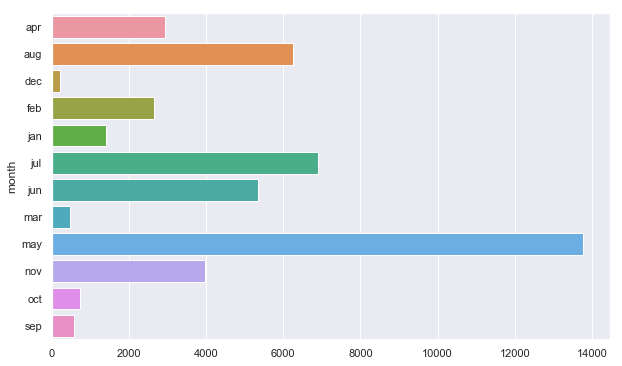

In [3]:
#Marketing activity per month
m_activity = df1.groupby(["month"]).size()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y= m_activity.keys(),x= m_activity.values)


In [4]:
marketing_type= df1.groupby(["contact"]).size()
fig = px.pie(df1, values=marketing_type.values, names=marketing_type.keys())
#fig.show()

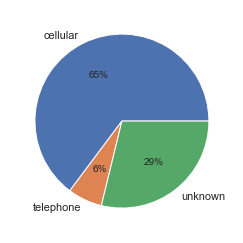

In [5]:
plt.pie(marketing_type, labels = marketing_type.keys(), autopct='%.0f%%')
plt.show()

In [6]:
#creating age groups
df1.loc[df1['age']<=30, 'age_group'] = '18-30'
df1.loc[df1['age'].between(31,40), 'age_group'] = '31-40'
df1.loc[df1['age'].between(41,50), 'age_group'] = '41-50'
df1.loc[df1['age'].between(51,60), 'age_group'] = '51-60'
df1.loc[df1['age']>60, 'age_group'] = '+60'

In [7]:
#new filtered df
df2 = df1.groupby(["age_group","y"]).size()
df2= pd.DataFrame(df2).reset_index()
df2 = df2.rename(columns={0:'values'})


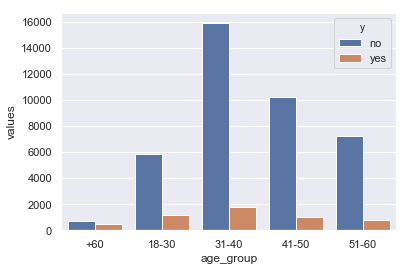

In [8]:
#plt age group and success of marketing campaing 
sns.barplot(x="age_group", y='values', hue="y", data=df2)

In [9]:
#success rate = sum of yes / total
#sum of positive
tot_yes = df2[df2['y']=='yes'].reset_index()
total_values = df2.groupby(['age_group'])[['values']].sum().reset_index()
#combining the data together
success_rate_df= pd.merge(tot_yes, total_values, how="inner", on=["age_group"])

In [10]:
#success rate colculation
success_rate_df['success_rate'] = round(success_rate_df['values_x']/success_rate_df['values_y']*100)

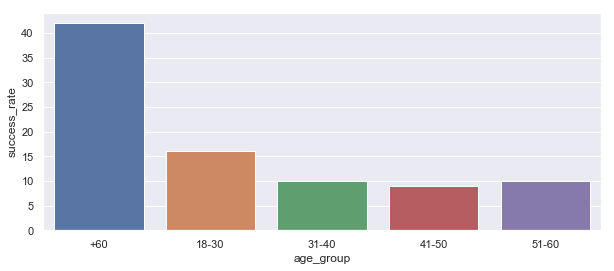

In [11]:
#success rate formula plotted
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x= success_rate_df.age_group,y= success_rate_df.success_rate)
    